In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import simulation as sim
import plot as pl
sns.set_context('talk')
sns.set_style("ticks")

In [25]:
enames = {'ET_NRK1': 'NadR', 'ET_NT5': 'SurE', 'ET_NMNAT1': 'NadD', 'ET_NAPRT': 'PncB', 'ET_NADS': 'NadE', 
          'ET_NAMPT': 'Nampt', 'ET_PNCA': 'PncA'}
# df = pd.read_csv('../data/new_PN_Keq_min_ATP.csv', sep='\t', index_col=0)
df = pd.read_csv('../data/new_PN_Keq_min_ATP_1.csv', sep='\t', index_col=0)
if not 'objective' in df.columns:
    df['objective'] = 'min_ATP'
df = df.rename(columns=enames)
try:
    df.pathway = df.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
except AttributeError:
    df.loc[(df.PncA < 0.001), 'pathway'] = 'Nampt'
    df.loc[(df.Nampt < 0.001), 'pathway'] = 'PncA'
df1 = df.replace(np.inf, np.nan).dropna(axis=0).reset_index()

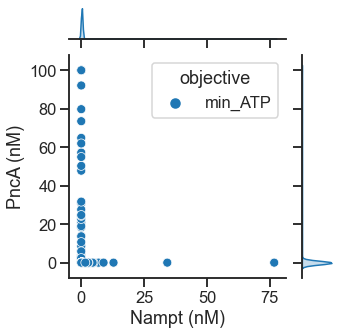

In [26]:
scaling = 1e-10 * 1e-3 * 1e9
df_ = df1[df1.objective == 'min_ATP']
jp = sns.jointplot(data=df_, x=df_["Nampt"]*scaling, y=df_["PncA"]*scaling, hue="objective", space=0.5, height=5)
jp.set_axis_labels('Nampt (nM)', 'PncA (nM)')
jp.savefig('../images/new_jointplot_min_ATP_1.png', dpi=300)

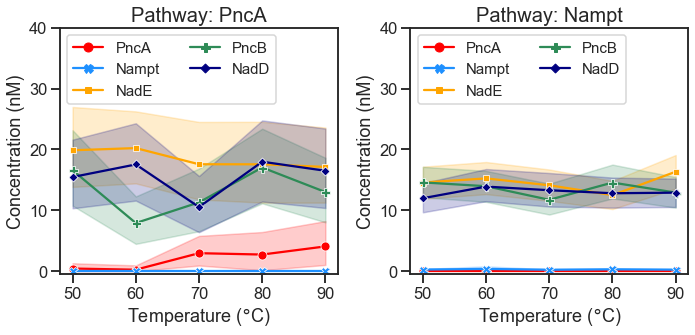

In [27]:
pl.subplot_abundance_objective(df=df1, objective='min_ATP', scaling=1e-10 * 1e-3 * 1e9, 
                               l1='upper left', l2='upper left', figsize=(10, 5), ncol=2, 
                               ylim1=[-5e-1, 4e1], ylim2=[-5e-1, 4e1], filename='../images/new_optimisedET_min_ATP_1.png')

In [21]:
# F = pd.read_csv('../data/new_Flux_min_ATP.csv', sep='\t', index_col=0)
F = pd.read_csv('../data/new_Flux_min_ATP_1.csv', sep='\t', index_col=0)
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
       'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
       'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
       'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
       'pathway', 'objective']

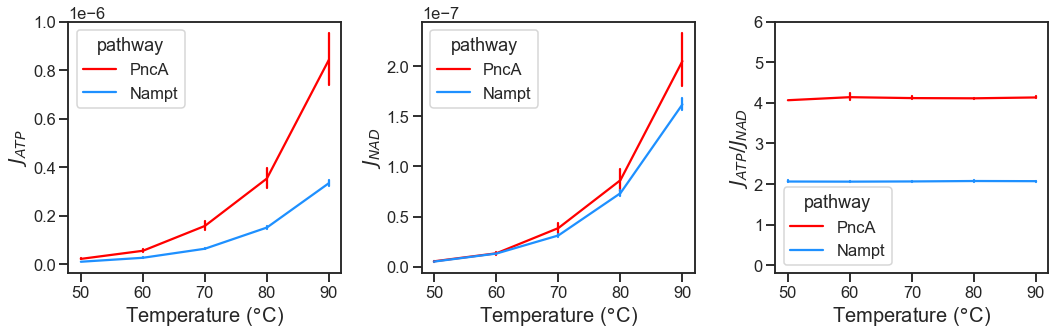

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
lp = sns.lineplot(data=F, x=F.temperature, y='ATP consumption', hue='pathway', hue_order=['PncA', 'Nampt'], 
                  palette=['#FF0000', '#1E90FF'], ax=ax[0], err_style='bars')
ax[0].set_ylabel('$J_{ATP}$', fontsize=20)
ax[0].set_xlabel('Temperature ($\degree$C)', fontsize=20)
#ax[0].set_ylim([-1e-5, 1e-3])

lp = sns.lineplot(data=F, x=F.temperature, y='NAD production', hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[1], err_style='bars')
ax[1].set_ylabel('$J_{NAD}$', fontsize=20)
ax[1].set_xlabel('Temperature ($\degree$C)', fontsize=20)

lp = sns.lineplot(data=F, x=F.temperature, y=F.ATPconsNADprod, hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[2], err_style='bars')
ax[2].set_ylabel('$J_{ATP}/J_{NAD}$', fontsize=20)
ax[2].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[2].ticklabel_format(style='scientific', axis='y', scilimits=(-4, 1))
ax[2].set_ylim([-2e-1, 6])
plt.tight_layout()
fig.savefig('../images/flux_min_ATP_1.png', dpi=300)

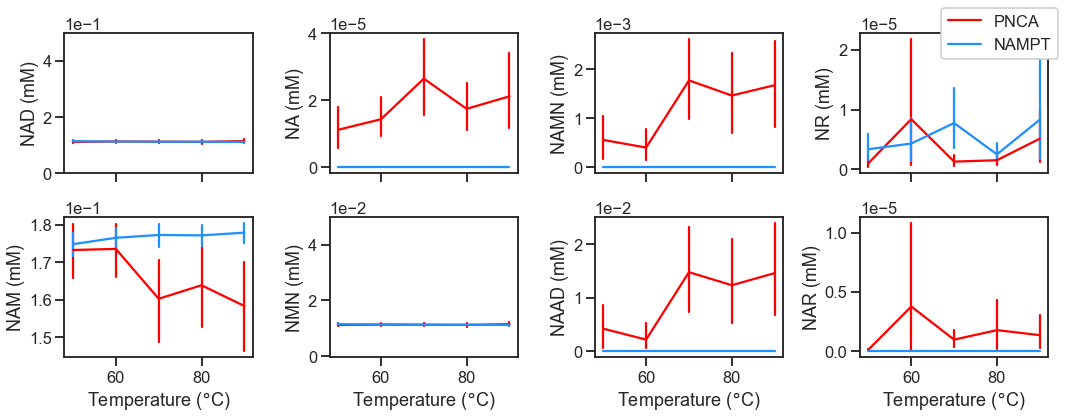

In [4]:
C = pd.read_csv('../data/new_Conc_min_ATP_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i:i+' (mM)' for i in mets[:-1]}).reset_index()
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2,4), figsize=(15,6), 
                    hue='pathway', sharex=True, filename='../images/conc_min_ATP_1.png')

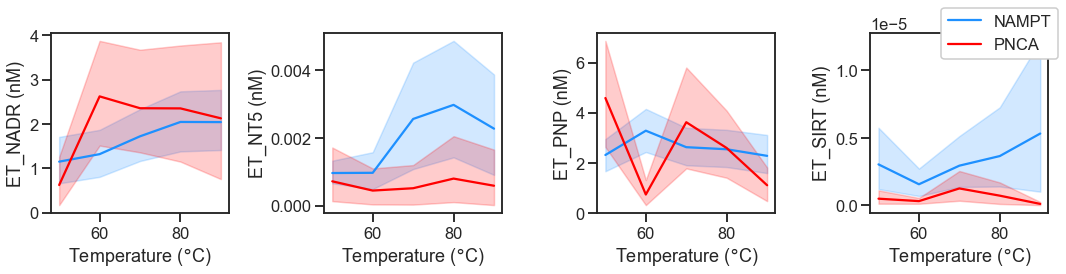

In [4]:
df = pd.read_csv('../data/new_PN_Keq_min_ATP.csv', sep='\t', index_col=0)
#df.loc[(df.pathway=='NAMPT'), 'pathway'] = 'NADV'
df = df.rename(columns=enames)
cols = ['ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
df[cols] = df[cols] * 1e-10 * 1e-3 * 1e9
df = df.rename(columns={i:i+' (nM)' for i in cols})
pl.subplot_lineplot(df=df.drop(['ET_PNCA', 'ET_NAMPT', 'ET_NADE', 'ET_PNCB', 'ET_NADD'], axis=1), 
                    layout=(1,4), figsize=(15, 4), hue='pathway', err_style='band', palette=['#1E90FF', '#FF0000'],
                    filename='../images/se_enzymes_min_ATP.png')

In [70]:
def subplot_lineplot(df, layout: tuple, figsize: tuple, xlabel='Temperature ($\degree$C)', color='blue', 
                     palette=['#FF0000', '#1E90FF'], **kwargs):        
    mets = [i+' ($\mu$M)' for i in ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR']]
    fig, axn = plt.subplots(layout[0], layout[1], figsize=figsize, sharex=kwargs.get('sharex', False), sharey=kwargs.get('sharey', False))
    for i, ax in enumerate(axn.flat):
        if i < len(df.columns):
            if 'hue' in kwargs:
                lp = sns.lineplot(data=df, y=mets[i], x=df.temperature, ax=ax, palette=palette, 
                                  hue=kwargs['hue'], err_style=kwargs.get('err_style', "bars"))
                lp.get_legend().remove()
            else:
                lp = sns.lineplot(data=df, y=mets[i], x=df.temperature, ax=ax, color=color)
            if kwargs.get('sharey', False) == True:
                lp.set(xlabel=xlabel)
                ax.set_title(df.columns[i])
            else:
                lp.set(xlabel=xlabel, ylabel=mets[i])
        else:
            break
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', framealpha=1.0)
    plt.tight_layout()
    if 'filename' in kwargs:
        fig.savefig(kwargs['filename'], dpi=300)
    return plt.show()

In [68]:
C

,temperature,NA ($\mu$M),NAMN ($\mu$M),NAM ($\mu$M),NAD ($\mu$M),NAAD ($\mu$M),NMN ($\mu$M),NAR ($\mu$M),H2O,ADP,...,PRPP,AMP,Gln,Glu,H3_ac,H3_deac,Pi,NR ($\mu$M),pathway,objective
0,60000.0,6.682116e-03,1.981155e+02,0.027378,100.000001,6.538053e-03,1.840015,3.921196e-03,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,5.168025e-07,PNCA,min_ATP
1,60000.0,2.501509e-03,6.782375e-04,0.376037,272.379831,2.978382e-03,27.237974,3.512045e-14,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,7.260173e-12,PNCA,min_ATP
2,60000.0,5.163126e-02,1.657311e+02,0.000024,100.055409,3.127085e+01,2.890952,6.197266e-06,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1.404936e-08,PNCA,min_ATP
3,60000.0,2.241930e-03,1.981171e+02,0.000190,100.038317,6.620411e-04,1.841525,5.079762e-11,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,6.234648e-14,PNCA,min_ATP
4,60000.0,2.262195e-05,1.975946e+02,0.010240,100.526656,1.393415e-03,1.867090,1.197323e-05,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1.383056e-08,PNCA,min_ATP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,50000.0,1.763439e+02,1.962470e-06,0.000142,112.414382,1.958767e-05,11.241521,-2.143474e-14,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,3.390443e-12,NAMPT,min_ATP
3831,50000.0,3.097651e-04,1.723894e+01,0.000069,100.254010,1.723894e+02,10.117284,2.244444e-05,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1.508320e-08,NAMPT,min_ATP
3832,50000.0,2.602751e-09,3.416304e-08,0.958167,271.856125,3.411606e-07,27.185708,-5.343583e-12,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,2.218488e-13,NAMPT,min_ATP
3833,50000.0,1.001377e-12,1.123374e-06,189.798643,100.064624,1.527960e-10,10.136168,3.593705e-08,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,5.625976e-04,NAMPT,min_ATP


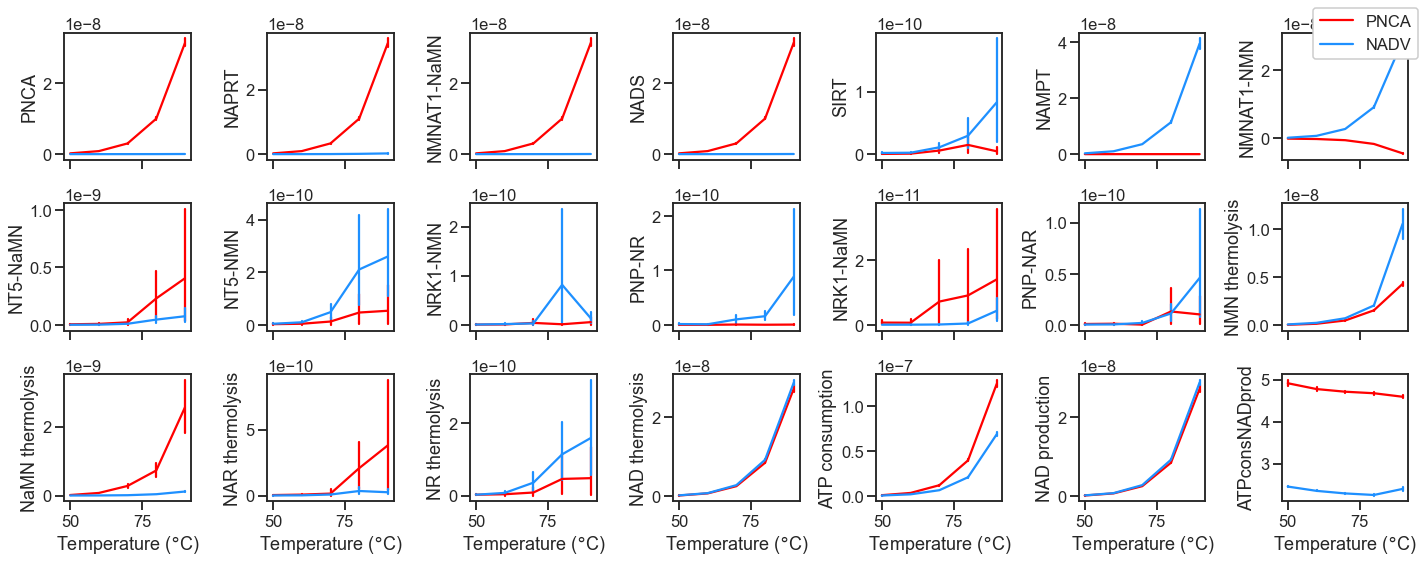

In [13]:
pl.subplot_lineplot(df=F[cols], layout=(3,7), figsize=(20,8), hue='pathway', sharex=True)

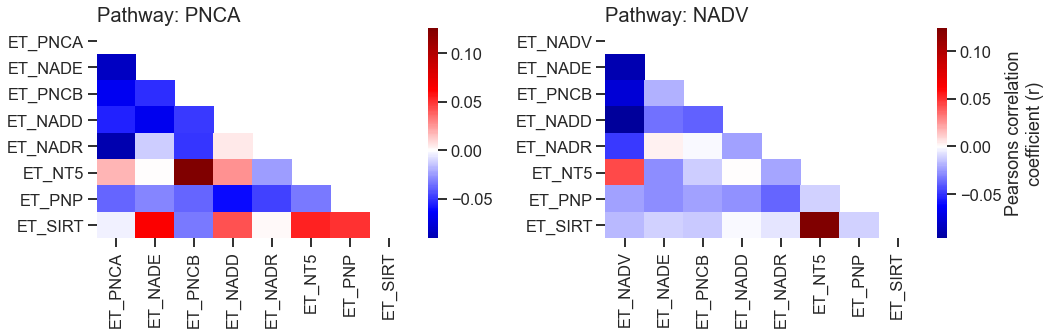

In [16]:
df = pd.read_csv('../data/new_PN_Keq_min_ATP.csv', sep='\t', index_col=0)
df.loc[(df.pathway=='NAMPT'), 'pathway'] = 'NADV'
df = df.rename(columns=enames)
cols = ['ET_PNCA', 'ET_NADV', 'ET_NADE', 'ET_PNCB', 'ET_NADD', 'ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
pl.plot_corr(dfP=df[(df.objective=='min_ATP') & (df.pathway=='PNCA')][cols[:1]+cols[2:]], 
             dfN=df[(df.objective=='min_ATP') & (df.pathway=='NADV')][cols[1:]], figsize=(15,5), sharey=False,
             filename='../images/new_corr_optimisedET_min_ATP.png')